# 0. Introduction

### This document shows the performance of optimal interpolation (OI) which merges station regression and merged reanalysis data.  
1. Background: merged reanalysis value and its error at station points.  
2. Observation: Station regression value and its error at station points.  
3. OI: For a target station, the inputs to OI include (1) background value and error for the target station, (2) background value and error for its nearby stations, and (3) observation value and error for its nearby stations. OI-merged estimate for this target station is caclulated using (1), (2), and (3).  
4. Evaluation: The actual observation at the target station is used for evaluation of background, observation, and OI-merged value at this target station. This is feasible because observation at this target station is not used in background, observation or OI.  

### Abbreviation:
Station regression using locally weighted regression method: regression  
Merged reanalysis from ERA5, MERRA2, and JRA55: reanalysis  
Regression-reanalysis merging using OI: OI  

### Brief conclusions:  
...

# 1. Load modules and files

In [2]:
import numpy as np
import auxiliary as au
import pandas
from matplotlib import pyplot as plt
import tabulate

def cal_statiscs(file_stn, file_regression, file_oimerge, var):
    # load station data
    d1=np.load(file_stn)
    stn_lle=d1['stn_lle']
    stndata=d1[var+'_stn']
    stndata[np.nanmean(stndata,axis=1)==0,:]=np.nan
    nstn,ntimes=np.shape(stndata)
    reanum = 3
    
    downdata=np.nan*np.zeros([reanum,nstn,ntimes], dtype=np.float32)
    d2=np.load(file_regression)
    downdata[0,:,:]=d2[var]
    d2=np.load(file_oimerge)
    downdata[1,:,:]=d2['reafinal_stn']
    downdata[2,:,:]=d2['oimerge_stn']
    
    # calculate the metrics for each station
    met_prcp=np.nan * np.zeros([reanum,nstn,4])
    for i in range(nstn):
        if np.isnan(stndata[i,0]):
            continue
        for r in range(reanum):
            met_prcp[r,i,:] = au.metric(stndata[i],downdata[r,i,:])

    mean_prcp = np.zeros([nstn,reanum+1])
    mean_prcp[:,0] = np.nanmean(stndata, axis=1)
    for i in range(reanum):
        mean_prcp[:,i+1]=np.nanmean(downdata[i], axis=1)
    return met_prcp, mean_prcp

file_stn='/Users/localuser/Research/EMDNA/stndata_whole.npz'
file_regression='/Users/localuser/Research/EMDNA/regression/daily_regression_stn.npz'

file_oimerge='/Users/localuser/Research/EMDNA/oimerge/OImerge_stn_GWRQMBMA_prcp.npz'
met_prcp, mean_prcp = cal_statiscs(file_stn, file_regression, file_oimerge, 'prcp')


file_oimerge='/Users/localuser/Research/EMDNA/oimerge/OImerge_stn_GWRQMBMA_tmean.npz'
met_tmean, mean_tmean = cal_statiscs(file_stn, file_regression, file_oimerge, 'tmean')

file_oimerge='/Users/localuser/Research/EMDNA/oimerge/OImerge_stn_GWRQMBMA_trange.npz'
met_trange, mean_trange = cal_statiscs(file_stn, file_regression, file_oimerge, 'trange')

mean_prcp[mean_prcp[:,3]==0,:]=np.nan
mean_tmean[mean_tmean[:,3]==0,:]=np.nan
mean_trange[mean_trange[:,3]==0,:]=np.nan

mean_prcp[np.isnan(mean_prcp[:,3]),:]=np.nan
mean_tmean[np.isnan(mean_tmean[:,3]),:]=np.nan
mean_trange[np.isnan(mean_trange[:,3]),:]=np.nan

met_prcp[:,np.isnan(met_prcp[2,:,0]),:]=np.nan
met_tmean[:,np.isnan(met_tmean[2,:,0]),:]=np.nan
met_trange[:,np.isnan(met_trange[2,:,0]),:]=np.nan

# lle
d1=np.load(file_stn)
stn_lle=d1['stn_lle']
del d1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/localuser/Github/PyGMET/auxiliary.py:150: RuntimeWarning: Mean of empty slice
  metout[1] = np.n

# 2. Spatial distribution

## 2.1 Precipitation

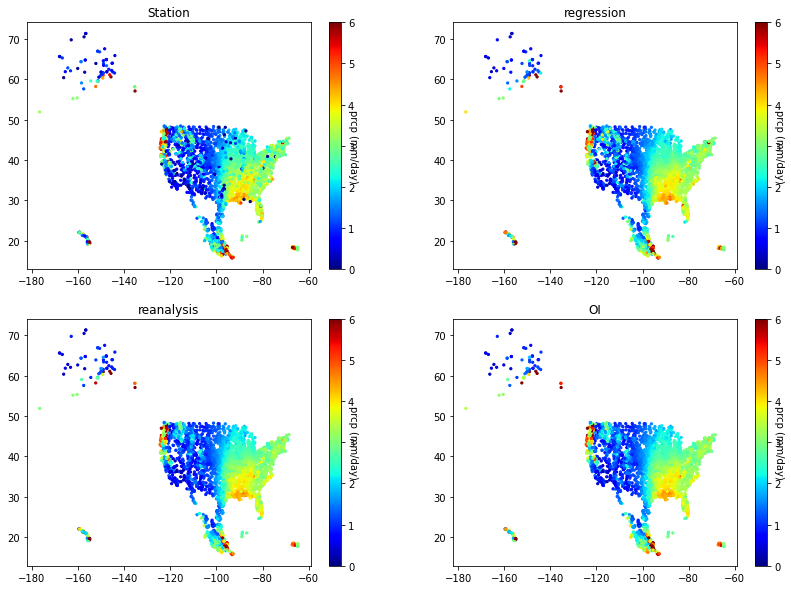

In [39]:
dplot = mean_prcp
titles=['Station','regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('prcp (mm/day)', rotation=270)
    plt.clim([0,6])
    plt.title(titles[i])

## 2.2 Tmean

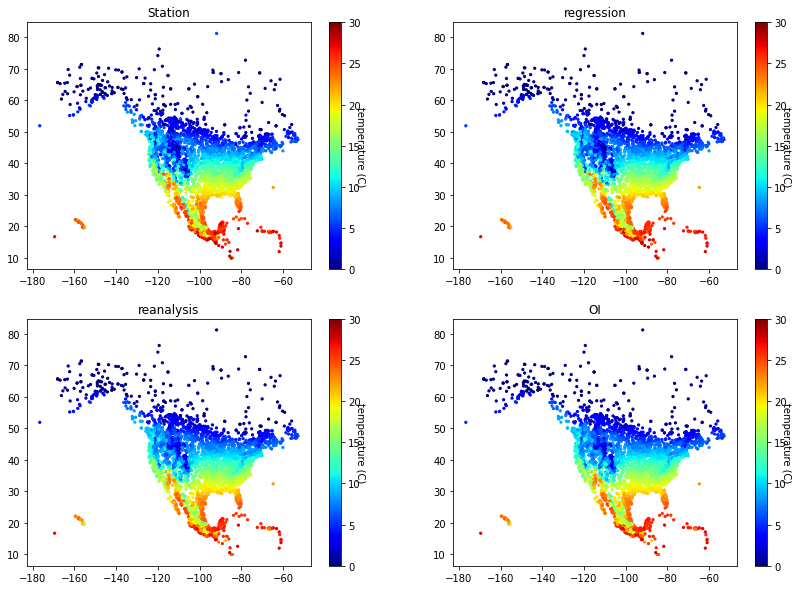

In [40]:
dplot = mean_tmean
titles=['Station','regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('temperature (C)', rotation=270)
    plt.clim([-0,30])
    plt.title(titles[i])

## 2.3 Trange

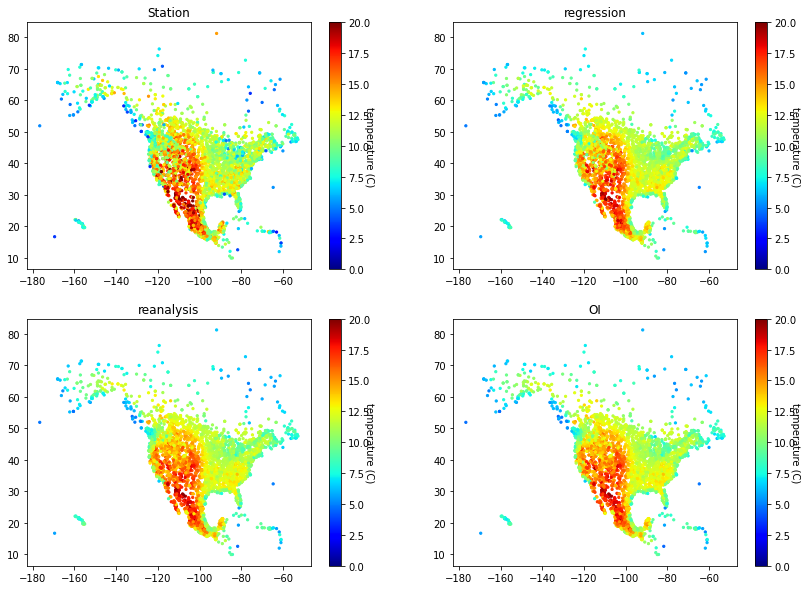

In [41]:
dplot = mean_trange
titles=['Station','regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[:,i],cmap='jet')
    cbar = plt.colorbar()
    cbar.set_label('temperature (C)', rotation=270)
    plt.clim([0,20])
    plt.title(titles[i])

# 3. Accuracy Evaluation

## Note: for this part, we should look more at distribution because the mean/median values are largely determined by stations in plain regions where the station number is very large

## 3.1 Precipitation

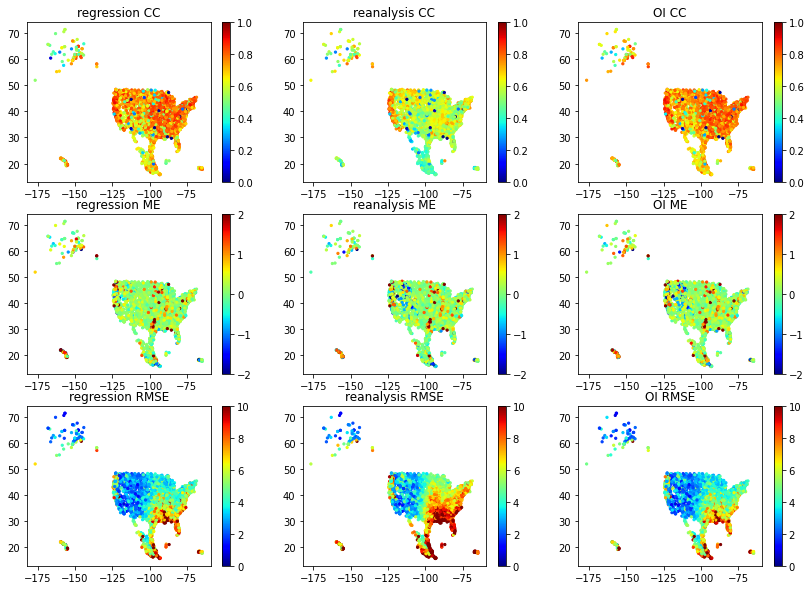

In [62]:
dplot=met_prcp
titles=['regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(3,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,3,i+7)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,10])
    plt.title(titles[i]+' RMSE')

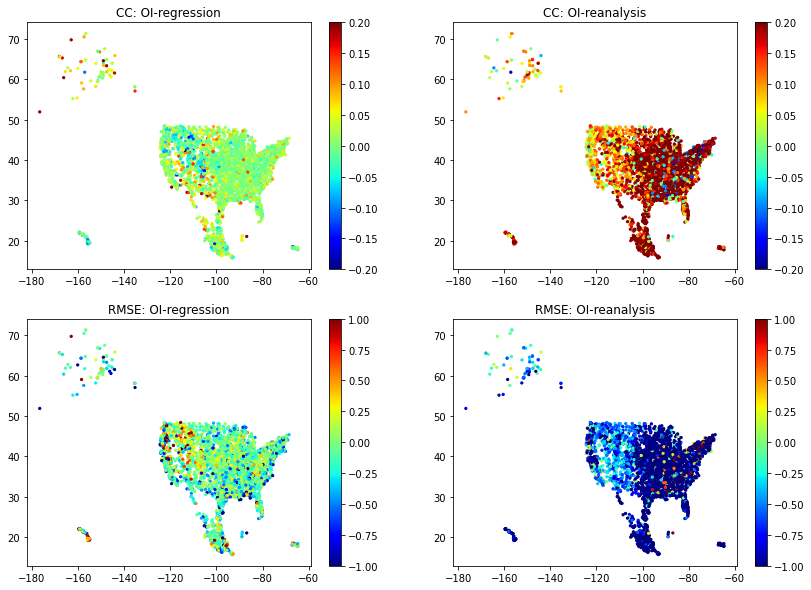

In [63]:
dplot=met_prcp
titles=['OI-regression','OI-reanalysis']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.2,0.2])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-1,1])
    plt.title('RMSE: '+titles[i])

In [64]:
metmean_prcp = np.zeros([3, 4])
for i in range(3):
    metmean_prcp[i] = np.nanmean(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmean_prcp,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_prcp = np.zeros([3, 4])
for i in range(3):
    metmedian_prcp[i] = np.nanmedian(met_prcp[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_prcp,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
              CC    ME   MAE  RMSE
regression  0.77  0.05  1.66  4.50
reanalysis  0.59  0.00  2.33  6.23
OI          0.78  0.06  1.72  4.46
##################################################
##################################################
Median metrics
             CC    ME   MAE  RMSE
regression  0.8  0.01  1.51  4.12
reanalysis  0.6 -0.01  2.31  6.26
OI          0.8  0.02  1.58  4.11


## 3.2 Tmean

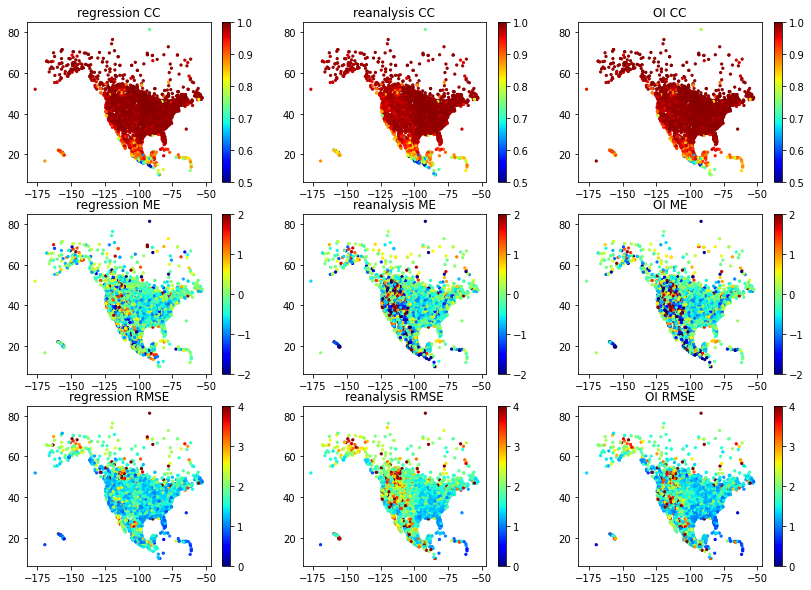

In [66]:
dplot=met_tmean
titles=['regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(3,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0.5,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,3,i+7)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,4])
    plt.title(titles[i]+' RMSE')

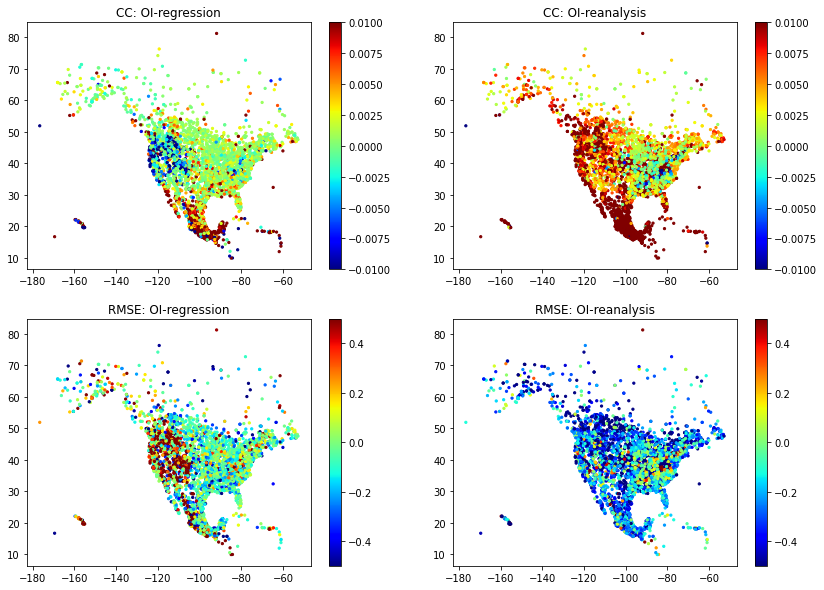

In [69]:
dplot=met_tmean
titles=['OI-regression','OI-reanalysis']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.01,0.01])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [68]:
metmean_tmean = np.zeros([3, 4])
for i in range(3):
    metmean_tmean[i] = np.nanmean(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmean_tmean,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_tmean = np.zeros([3, 4])
for i in range(3):
    metmedian_tmean[i] = np.nanmedian(met_tmean[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_tmean,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
              CC    ME   MAE  RMSE
regression  0.96  0.00  1.30  1.71
reanalysis  0.95 -0.02  1.68  2.14
OI          0.96 -0.02  1.46  1.85
##################################################
##################################################
Median metrics
              CC    ME   MAE  RMSE
regression  0.99 -0.00  1.16  1.54
reanalysis  0.98 -0.04  1.47  1.93
OI          0.99 -0.06  1.20  1.57


## 3.3 Trange

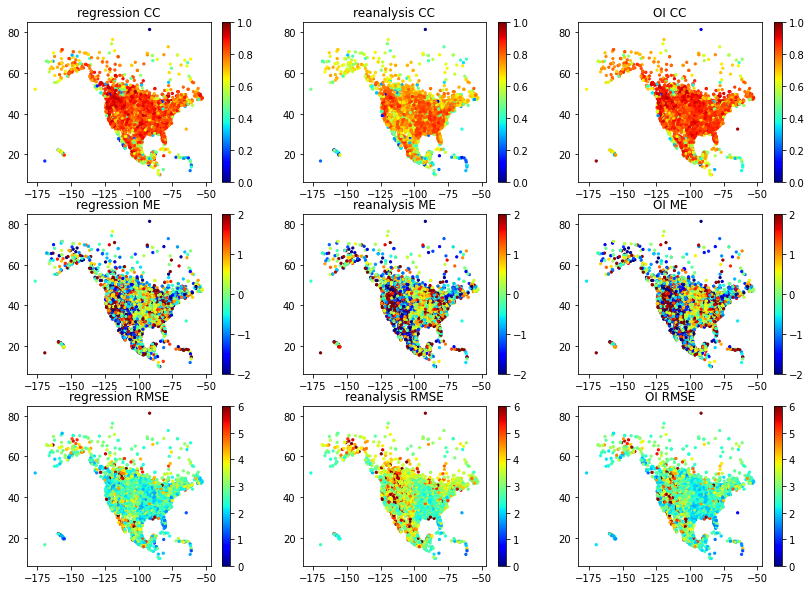

In [70]:
dplot=met_trange
titles=['regression','reanalysis','OI']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(3,3,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,1])
    plt.title(titles[i]+' CC')
    
    plt.subplot(3,3,i+4)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,1],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-2, 2])
    plt.title(titles[i]+' ME')
    
    plt.subplot(3,3,i+7)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([0,6])
    plt.title(titles[i]+' RMSE')

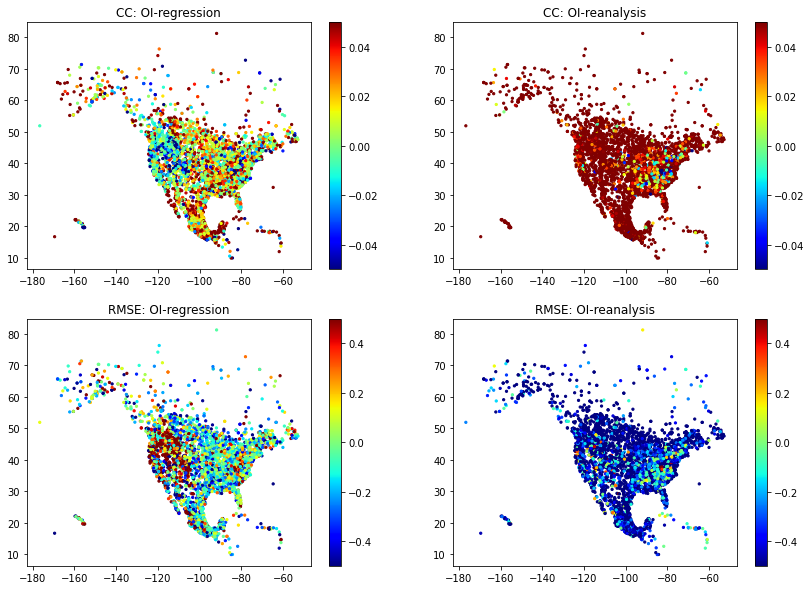

In [71]:
dplot=met_trange
titles=['OI-regression','OI-reanalysis']
plt.figure(figsize=[14,10])
for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,0]-dplot[i,:,0],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.05,0.05])
    plt.title('CC: '+titles[i])
    
    plt.subplot(2,2,i+3)
    plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dplot[2,:,3]-dplot[i,:,3],cmap='jet')
    cbar = plt.colorbar()
    plt.clim([-0.5,0.5])
    plt.title('RMSE: '+titles[i])

In [72]:
metmean_trange = np.zeros([3, 4])
for i in range(3):
    metmean_trange[i] = np.nanmean(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmean_trange,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Mean metrics')
print(df.round(2))

print('##################################################')
print('##################################################')

metmedian_trange = np.zeros([3, 4])
for i in range(3):
    metmedian_trange[i] = np.nanmedian(met_trange[i,:,:],axis=0)
df = pandas.DataFrame(metmedian_trange,['regression','reanalysis','OI'],['CC', 'ME', 'MAE', 'RMSE'])
print('Median metrics')
print(df.round(2))

Mean metrics
              CC    ME   MAE  RMSE
regression  0.78 -0.04  2.24  2.90
reanalysis  0.68 -0.00  2.82  3.63
OI          0.80 -0.04  2.32  2.95
##################################################
##################################################
Median metrics
              CC    ME   MAE  RMSE
regression  0.82 -0.05  2.07  2.71
reanalysis  0.71 -0.05  2.69  3.52
OI          0.83 -0.08  2.08  2.71
